Recurrent Neural Network (RNN) / Long Short Term Memory (LSTM) Model

In [1]:
# jupternotebooks code that fits the display window to my screen
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:85% !important; }</style>"))

In [21]:
# import the neccessary libraries

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Bidirectional
import matplotlib.pyplot as plt

# import our dataset
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# normalize our dataset
x_train = x_train / 255.0
x_test = x_test / 255.0

# shape of each image set
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [22]:
# build the LSTM model
regressor = Sequential()
# Add a LSTM layer with 128 internal units
regressor.add(LSTM(128, input_shape=(x_train.shape[1:]), activation='relu', return_sequences=True))
regressor.add(Dropout(0.2))

# Add a LSTM layer with 128 internal units 
regressor.add(LSTM(128, activation='relu'))
regressor.add(Dropout(0.1))

# Add a Dense layer with 32 units and a dropout
regressor.add(Dense(32, activation='relu'))
regressor.add(Dropout(0.2))

# Add a Dense layer with 10 units
regressor.add(Dense(10, activation='softmax'))

In [23]:
opt = tf.keras.optimizers.Adam(lr=0.001, decay = 0.000001)

regressor.compile(loss = 'sparse_categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

history = regressor.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 99s 2ms/sample - loss: 0.5805 - accuracy: 0.8111 - val_loss: 0.1390 - val_accuracy: 0.9623
Epoch 2/5
60000/60000 [==============================] - 100s 2ms/sample - loss: 0.1386 - accuracy: 0.9619 - val_loss: 0.0857 - val_accuracy: 0.9772
Epoch 3/5
60000/60000 [==============================] - 102s 2ms/sample - loss: 0.0994 - accuracy: 0.9739 - val_loss: 0.0571 - val_accuracy: 0.9824
Epoch 4/5
60000/60000 [==============================] - 102s 2ms/sample - loss: 0.0752 - accuracy: 0.9801 - val_loss: 0.0738 - val_accuracy: 0.9782
Epoch 5/5
60000/60000 [==============================] - 103s 2ms/sample - loss: 0.0708 - accuracy: 0.9815 - val_loss: 0.0569 - val_accuracy: 0.9835


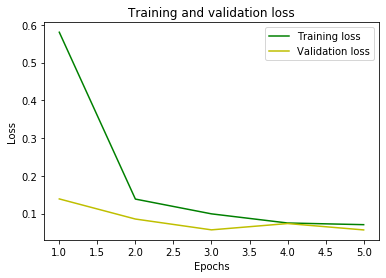

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [24]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'y', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# evaluate the trained model with test_images and test_labels
test_loss, test_acc = regressor.evaluate(x_test, y_test)
print('test_acc:', test_acc)